In [22]:
# load pickle
import pickle
from utils import *
import os


# load results/100_questions_5_Shot_201-301-CCNA_2024_08_06_11_08_FULL_RUN/100_questions_201-301-CCNA_Llama3.1 405B Instruct_shuffled_0.pkl

ccna_df = pickle.load(open("../results/100_questions_5_Shot_201-301-CCNA_2024_08_06_11_08_FULL_RUN/llm_5_Shot_201-301-CCNA.pkl", "rb"))
ccna_df_raw = pickle.load(open("../results/100_questions_5_Shot_201-301-CCNA_llama31_405b_RAW/llm_5_Shot_201-301-CCNA.pkl", "rb"))
#ccnp_df = pickle.load() 

/tmp/ipykernel_310172/2284839737.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ccna_df_raw["Model"][0] = "Llama3.1 405B Instruct raw"
/tmp/ipykernel_310172/2284839737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy

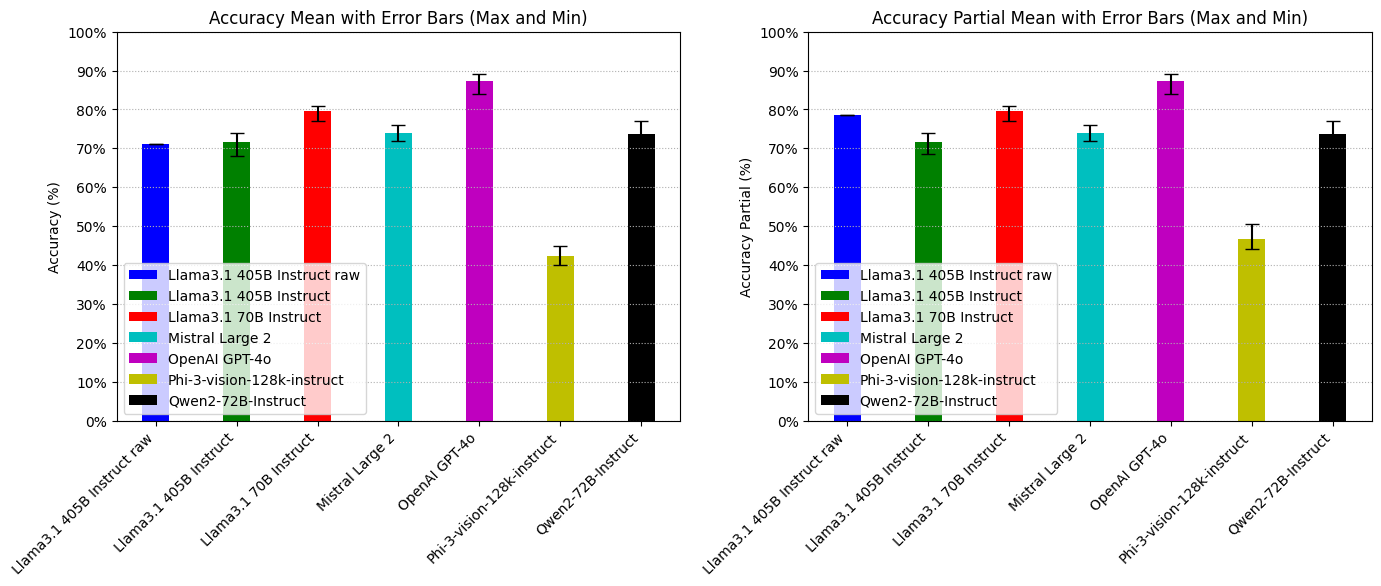

In [23]:
#rename ccna_df in column "Model", row 0 to Llama3.1 405B Instruct raw
ccna_df_raw["Model"][0] = "Llama3.1 405B Instruct raw"
#concad row 1 in ccna_df to ccna_df_raw
df3 = pd.concat([ccna_df_raw, ccna_df.iloc[1:]], ignore_index=True)
plot_evaluation_CCNA(df3)

# CCNA & CCNP 5 Shot Anaylsis

/tmp/ipykernel_310172/1199213656.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  shuffled_evalutation_df = pd.concat([shuffled_evalutation_df, evaluation_df], ignore_index=True)


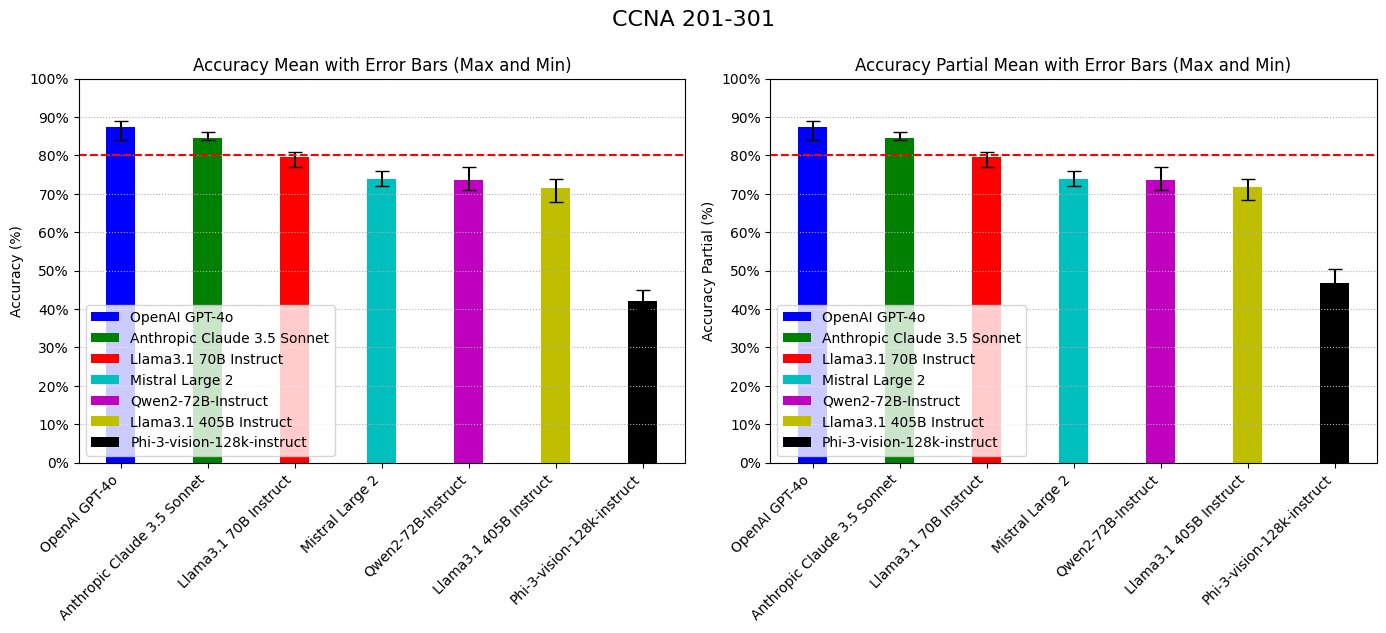

In [25]:
CCNA_folder_paths = ["../results/100_questions_5_Shot_201-301-CCNA_2024_08_06_11_08_FULL_RUN"]
CCNA_model_statistics = stats_from_pickle(CCNA_folder_paths)
title="CCNA 201-301"
plot_evaluation_CCNA(CCNA_model_statistics, hline_accuracy=0.8, hline_partial=0.8, title=title)

/tmp/ipykernel_310172/1199213656.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  shuffled_evalutation_df = pd.concat([shuffled_evalutation_df, evaluation_df], ignore_index=True)


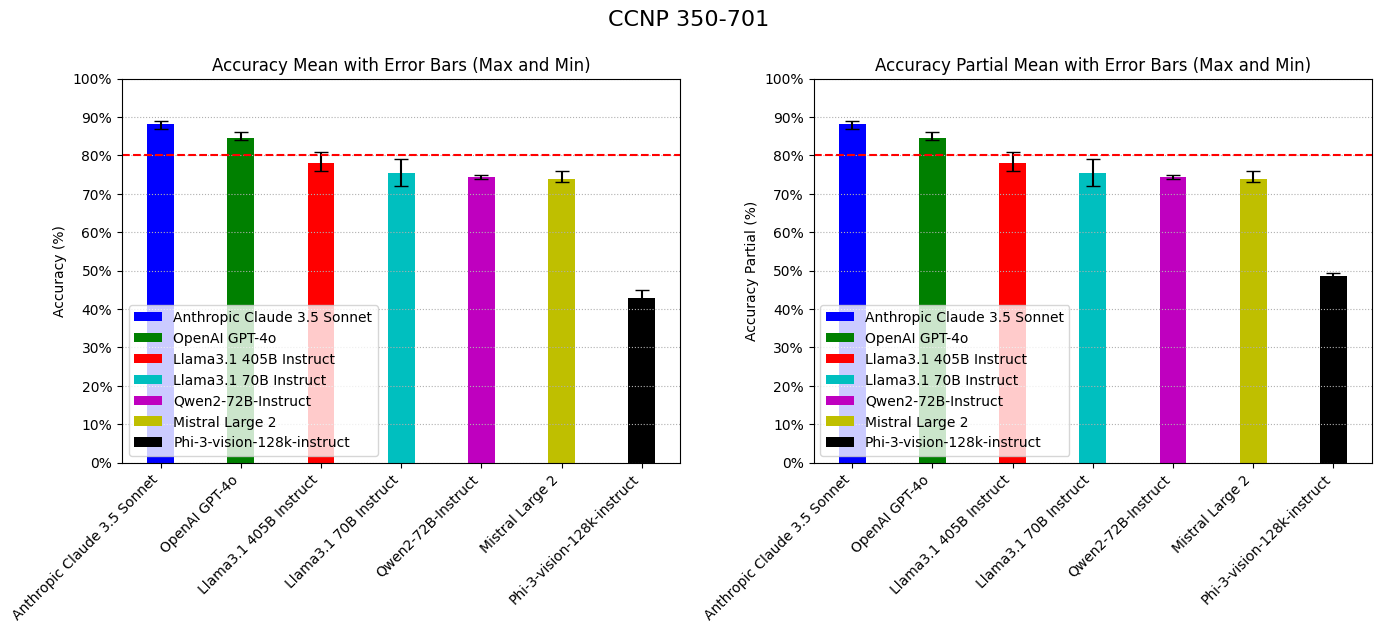

In [26]:
CCNP_folder_paths = [
    "../results/100_questions_5_Shot_350-701-CCNP_2024_08_06_15_28",
               "../results/100_questions_5_Shot_350-701-CCNP_2024_08_06_18_04",
               "../results/100_questions_5_Shot_350-701-CCNP_2024_08_06_18_15"
               ]
CCNP_model_statistics = stats_from_pickle(CCNP_folder_paths)
title="CCNP 350-701"
plot_evaluation_CCNA(CCNP_model_statistics, hline_accuracy=0.8, hline_partial=0.8, title=title)

COT 

In [46]:
import re

def extract_uppercase_letters(text):
    # Define the regex pattern to match the segment between "answer is" and the period.
    pattern = r'answer is ([^.]*?)\.'

    # Search the text for the pattern
    match = re.search(pattern, text)

    if match:
        # Extract the relevant segment
        segment = match.group(1)
        # Find all uppercase letters in the segment
        uppercase_letters = re.findall(r'[A-Z]', segment)
        return uppercase_letters
    else:
        return []

def stats_from_pickle(folder_paths):
    shuffled_evalutation_df = pd.DataFrame(columns=[ 'Number of Questions','Correctly Answered','Incorrectly Answered','Accuracy','Accuracy Partial'])

    pkl_files = []
    for folder_path in folder_paths:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if "shuffled" in file and file.endswith(".pkl"):
                    pkl_files.append(os.path.join(root, file))
                    
    for file in pkl_files:
        llm_exam_result = pickle.load(open(file, "rb"))
        #print(extract_uppercase_letters(llm_exam_result["LLM_Answer"][0]))
        #iterate over the row of the dataframe llm_exam_result
        for index, row in llm_exam_result.iterrows():
            #print(row["LLM_Answer"])
            llm_answer = extract_uppercase_letters(row["LLM_Answer"])
            num_of_correct_llm_answer, answerLLm, too_many_answers, answered_correctly, number_of_incorrect_llm_answers = evaluation_sampling(llm_answer, row["Exam_Answers"], row["NumberOfCorrectExamAnswers"])
            #modify the dataframe accordign to the evaluation
            llm_exam_result.at[index, 'NumberOfIncorrectLLMAnswers'] = number_of_incorrect_llm_answers
            llm_exam_result.at[index, 'NumberOfCorrectLLMAnswers'] = num_of_correct_llm_answer
            llm_exam_result.at[index, 'Ratio'] = num_of_correct_llm_answer/row["NumberOfCorrectExamAnswers"]
            llm_exam_result.at[index, 'Answered_Correctly'] = answered_correctly
            llm_exam_result.at[index, 'Too_Many_answers'] = too_many_answers
            llm_exam_result.at[index, 'NumberOfCorrectLLMAnswers'] = num_of_correct_llm_answer
        evaluation_df = evaluation(llm_exam_result)
        #Concat the evaluation dataframe to the complete dataframe
        shuffled_evalutation_df = pd.concat([shuffled_evalutation_df, evaluation_df], ignore_index=True)
    model_statistics = calculate_model_statistics(shuffled_evalutation_df)
    #sort the model statistics by accuracy
    return model_statistics.sort_values(by="Accuracy Mean", ascending=False, ignore_index=True)

CCNA_COTfolder_paths = [
    #"../results/100_questions_0_Shot_COT_201-301-CCNA_2024_08_06_19_15",
    "../results/100_questions_0_Shot_COT_201-301-CCNA_2024_08_06_20_49",
    "../results/100_questions_0_Shot_COT_201-301-CCNA_2024_08_06_20_50",
    "../results/100_questions_0_Shot_COT_201-301-CCNA_2024_08_06_22_17"
    ]
CCNA_COTmodel_statistics = stats_from_pickle(CCNA_COTfolder_paths)


TypeError: expected string or bytes-like object

/tmp/ipykernel_310172/1354378957.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  shuffled_evalutation_df = pd.concat([shuffled_evalutation_df, evaluation_df], ignore_index=True)


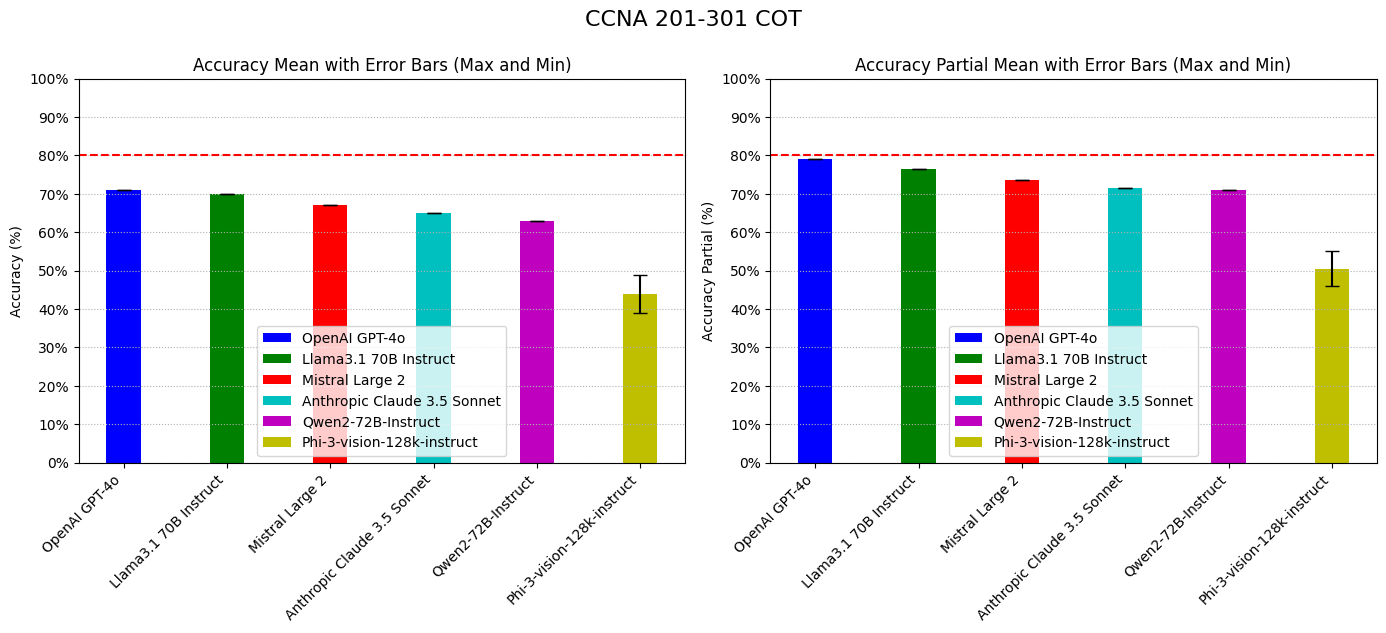

In [36]:

title="CCNA 201-301 COT"
plot_evaluation_CCNA(CCNA_COTmodel_statistics, hline_accuracy=0.8, hline_partial=0.8, title=title)

<Axes: title={'center': 'Difference in Accuracy Partial and Accuracy'}, xlabel='Model'>

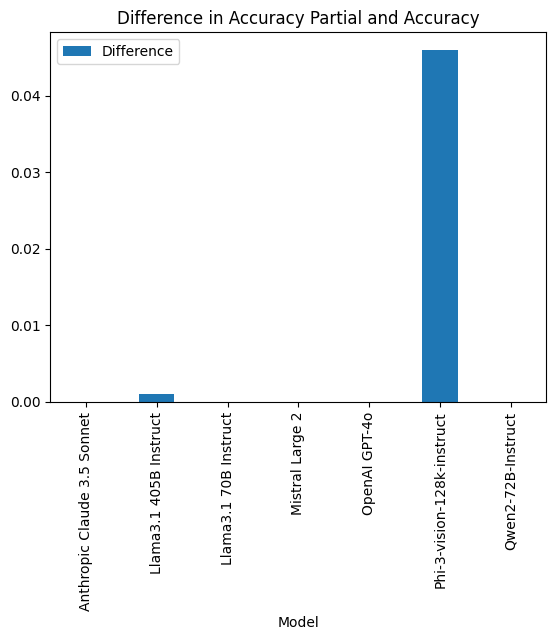

In [28]:
# plot the difference between the two Accuracy Partial and Accuracy
ccna_df["Difference"] = ccna_df["Accuracy Partial Mean"] - ccna_df["Accuracy Mean"]
ccna_df.set_index("Model")["Difference"].plot(kind="bar", title="Difference in Accuracy Partial and Accuracy", legend=True)
#the 0 should be in the midel of the plot so negativ values are shown on the bottom and positive on the top

                         Model  Accuracy_Mean_LLM  Accuracy Max  Accuracy Min  \
0  Anthropic Claude 3.5 Sonnet              0.846          0.86          0.84   
1       Llama3.1 405B Instruct              0.716          0.74          0.68   
2        Llama3.1 70B Instruct              0.796          0.81          0.77   
3              Mistral Large 2              0.740          0.76          0.72   
4                OpenAI GPT-4o              0.874          0.89          0.84   
5   Phi-3-vision-128k-instruct              0.422          0.45          0.40   
6           Qwen2-72B-Instruct              0.736          0.77          0.71   

   Accuracy STD  Accuracy Partial Mean  Accuracy Partial Max  \
0      0.008944                  0.846                 0.860   
1      0.028810                  0.717                 0.740   
2      0.016733                  0.796                 0.810   
3      0.014142                  0.740                 0.760   
4      0.019494                

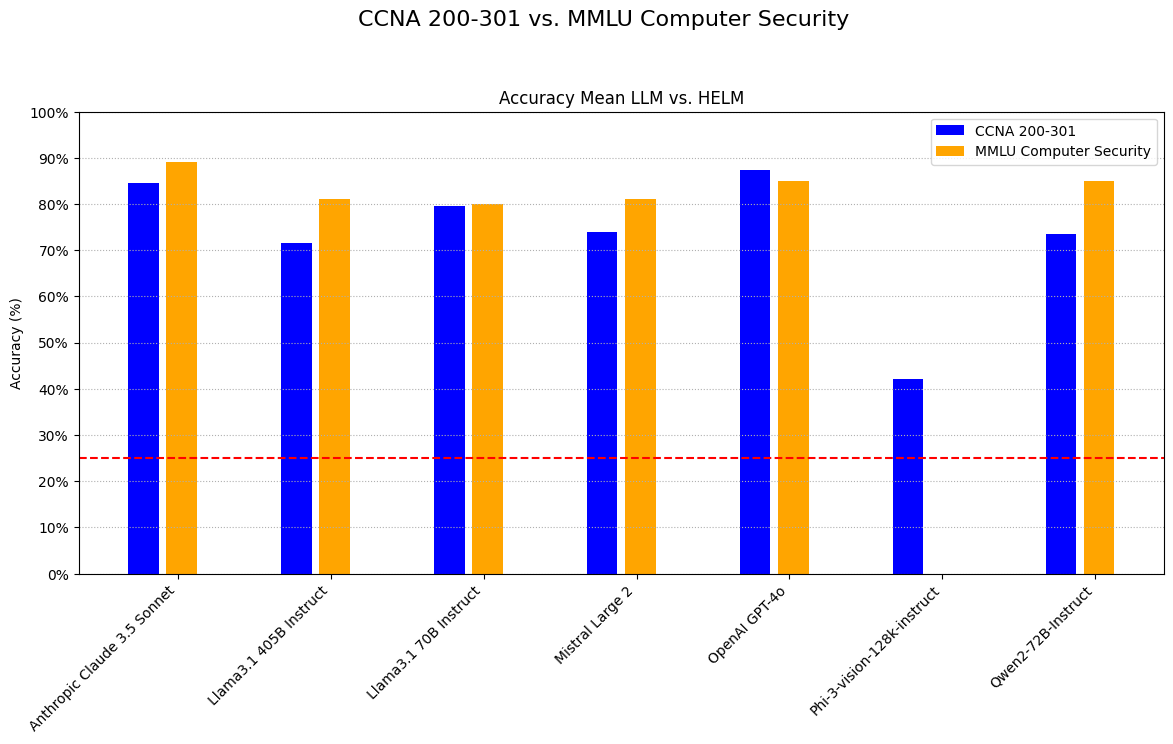

In [29]:
HELM_RESULT = pd.read_csv("../data/helm_sec_mmlu_results.csv")
plot_evaluation_MMLU(ccna_df, HELM_RESULT, "CCNA 200-301", "MMLU Computer Security", title="CCNA 200-301 vs. MMLU Computer Security")